In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

Matplotlib is building the font cache; this may take a moment.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)


In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
#Task 1: Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [9]:
# Convert the "Class" column to a NumPy array and assign it to Y
Y = data['Class'].to_numpy()

# To check if Y is indeed a NumPy array:
print(type(Y))  # Should output: <class 'numpy.ndarray'>
print(Y)  # Should display the array of values from the 'Class' column

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Task 2: Standardize the data in X then reassign it to the variable X using the transform provided below.

In [10]:
# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Standardize the data (fit and transform)
X = transform.fit_transform(X)

# Check the standardized data
print(X)

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 ...
 [ 1.63592675e+00  1.99100483e+00  3.49060516e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.67441914e+00  1.99100483e+00  1.00389436e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.71291154e+00 -5.19213966e-01 -6.53912840e-01 ... -8.35531692e-01
  -5.17306132e-01  5.17306132e-01]]


In [ ]:
#Task 3: split data x & y into training and testing data. Use he parameter test_size to 0.2 and random_state to 2.

In [11]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
# Print the shape of the splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


In [ ]:
#Task 4: Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [13]:
# Define the hyperparameter grid
log_parameters = {
    "C": [0.01, 0.1, 1],          # Regularization strength
    "penalty": ['l2'],             # Regularization type (L2 for Ridge)
    "solver": ['lbfgs']            # Solver (lbfgs is a good default)
}

# Create the Logistic Regression model
lr = LogisticRegression()

# Create a GridSearchCV object with cv=10 (10-fold cross-validation)
logreg_cv = GridSearchCV(lr, log_parameters, cv=10)

# Assuming X_train and Y_train are your training data and target labels
# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [ ]:
#Task 5: Calculate the accuracy on the test data using the method Score

In [19]:
# Assuming you have the best model from GridSearchCV
best_logreg_model = logreg_cv.best_estimator_

# Calculate accuracy on the test data
accuracy = best_logreg_model.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy on the test data: {accuracy:}")

Accuracy on the test data: 0.8333333333333334


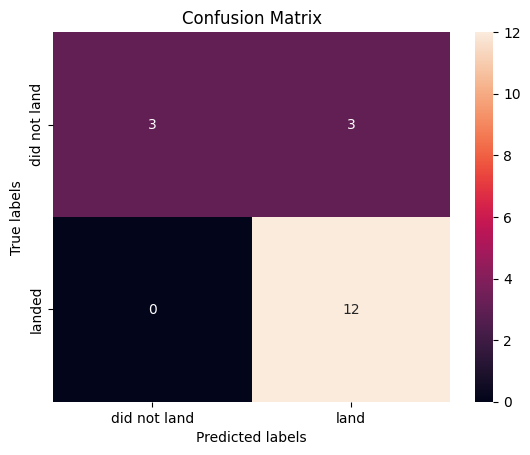

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Task 6: Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [16]:
# Define the hyperparameter grid
svm_parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # Type of kernel
    'C': np.logspace(-3, 3, 5),  # Regularization parameter (logarithmic scale)
    'gamma': np.logspace(-3, 3, 5)  # Kernel coefficient (logarithmic scale)
}

# Create the SVM model
svm = SVC()

# Create a GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)

# Fit the GridSearchCV object to the training data (X_train, Y_train)
svm_cv.fit(X_train, Y_train)

# Print the best parameters found by GridSearchCV
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [ ]:
# Task 7: Calculate the accuracy on the test data using method score

In [20]:
# Assuming you have the best model from GridSearchCV
best_svm_model = svm_cv.best_estimator_

# Calculate accuracy on the test data
accuracy = best_svm_model.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy on the test data: {accuracy:}")

Accuracy on the test data: 0.8333333333333334


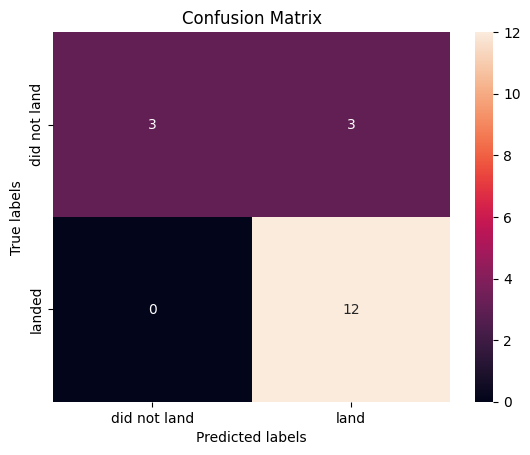

In [21]:
#plot the confusion matrix
yhat=best_svm_model.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
#task 8: Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [24]:
#Define the parameters
tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2','sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#Create decision tree model
tree = DecisionTreeClassifier()

#Create the GridSearchCV object with cv=10 (10-fold cross-validation)
tree_cv = GridSearchCV(tree, param_grid=tree_parameters, cv=10)

#Fit the GridSearchCV object to the data
tree_cv.fit(X_train, Y_train)

#Output the best parameters found
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875


In [ ]:
# Task 9: calculate the accuracy of tree_cv on the test data using the method score & plot confusion matrix

In [25]:
# Assuming you have the best model from GridSearchCV
best_tree_model = tree_cv.best_estimator_

# Calculate accuracy on the test data
accuracy = best_tree_model.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy on the test data: {accuracy:.4f}")

Accuracy on the test data: 0.8333


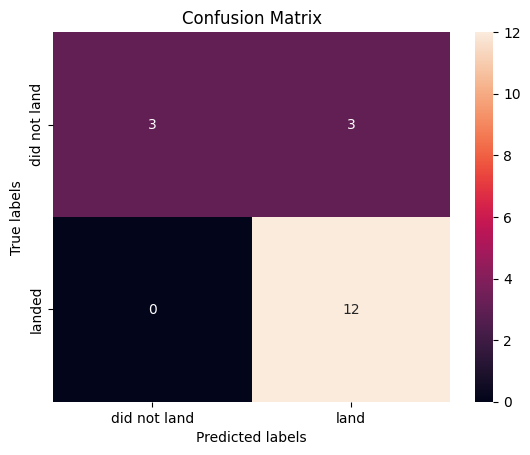

In [26]:
yhat = best_tree_model.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
#Task 10: create a k nearest neighbors object then create a gridsearchcv object knn_cv with cv=10. Fit the object to find the best parameters from the dictonary parameters.

In [28]:
# Initialize KNeighborsClassifier
KNN = KNeighborsClassifier()

# Define the parameter grid
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the model to your training data
knn_cv.fit(X_train, Y_train)

# Check the best parameters found by GridSearchCV
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [ ]:
#Task 11: Calculate the accuracy of knn_cv on the test data using the method score & Plot confusion matrix

In [29]:
# Assuming you have the best model from GridSearchCV
best_knn_model = knn_cv.best_estimator_

# Calculate accuracy on the test data
accuracy = best_knn_model.score(X_test, Y_test)

# Print the accuracy
print(f"Accuracy on the test data: {accuracy:.4f}")

Accuracy on the test data: 0.8333


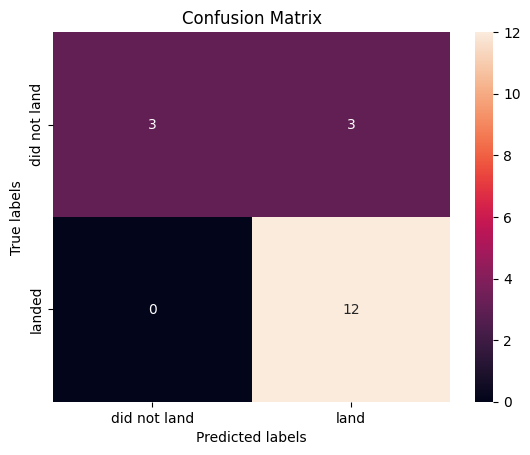

In [30]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
#Task 12: determine which method performs best for this data

In [32]:
log_accuracy = best_logreg_model.score(X_test, Y_test)
svm_accuracy = best_svm_model.score(X_test, Y_test)
tree_accuracy = best_tree_model.score(X_test, Y_test)
knn_accuracy = best_knn_model.score(X_test, Y_test)

print("LogReg Test Accuracy:", log_accuracy)
print("SVM Test Accuracy:", svm_accuracy)
print("Tree Test Accuracy:", tree_accuracy)
print("KNN Test Accuracy:", knn_accuracy)

print("LogReg Training Accuracy:", logreg_cv.best_score_)
print("SVM Training Accuracy:", svm_cv.best_score_)
print("Tree Training Accuracy:", tree_cv.best_score_)
print("KNN Training Accuracy:", knn_cv.best_score_)

LogReg Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Tree Test Accuracy: 0.8333333333333334
KNN Test Accuracy: 0.8333333333333334
LogReg Training Accuracy: 0.8464285714285713
SVM Training Accuracy: 0.8482142857142856
Tree Training Accuracy: 0.875
KNN Training Accuracy: 0.8482142857142858


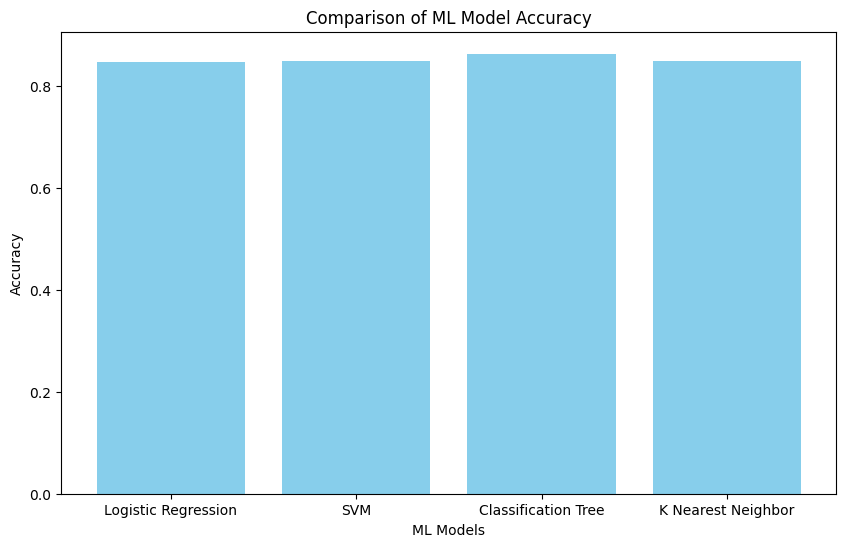

In [33]:
# List of machine learning models and their accuracy
models = ['Logistic Regression', 'SVM', 'Classification Tree', 'K Nearest Neighbor']
accuracy = [0.8464285714285713, 0.8482142857142856, 0.8625, 0.8482142857142858]

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(models, accuracy, color='skyblue')

# Add title and labels
plt.title('Comparison of ML Model Accuracy')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')

# Show the plot
plt.show()